<font face="宋体">提前导入相关库</font>

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans

matplotlib.rcParams['font.sans-serif'] = ['Times New Roman']
matplotlib.rcParams['axes.unicode_minus'] = False
path = os.path.dirname(os.getcwd())
sys.path.append(path)

from common.filesio import FilesIO

### <font face="黑体">a.读取数据并删除缺失值</font>

In [2]:
data = pd.read_csv(FilesIO.getHomeworkData("credit_card.csv"), 
                   index_col=0, encoding="utf-8")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

<font face="宋体">删除缺失值</font>

In [3]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8636 non-null   float64
 1   BALANCE_FREQUENCY                 8636 non-null   float64
 2   PURCHASES                         8636 non-null   float64
 3   ONEOFF_PURCHASES                  8636 non-null   float64
 4   INSTALLMENTS_PURCHASES            8636 non-null   float64
 5   CASH_ADVANCE                      8636 non-null   float64
 6   PURCHASES_FREQUENCY               8636 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 10  CASH_ADVANCE_TRX                  8636 non-null   int64  
 11  PURCHASES_TRX                     8636 non-null   int64  
 12  CRED

### <font face="黑体">b.探索性分析，画出直方图</font>

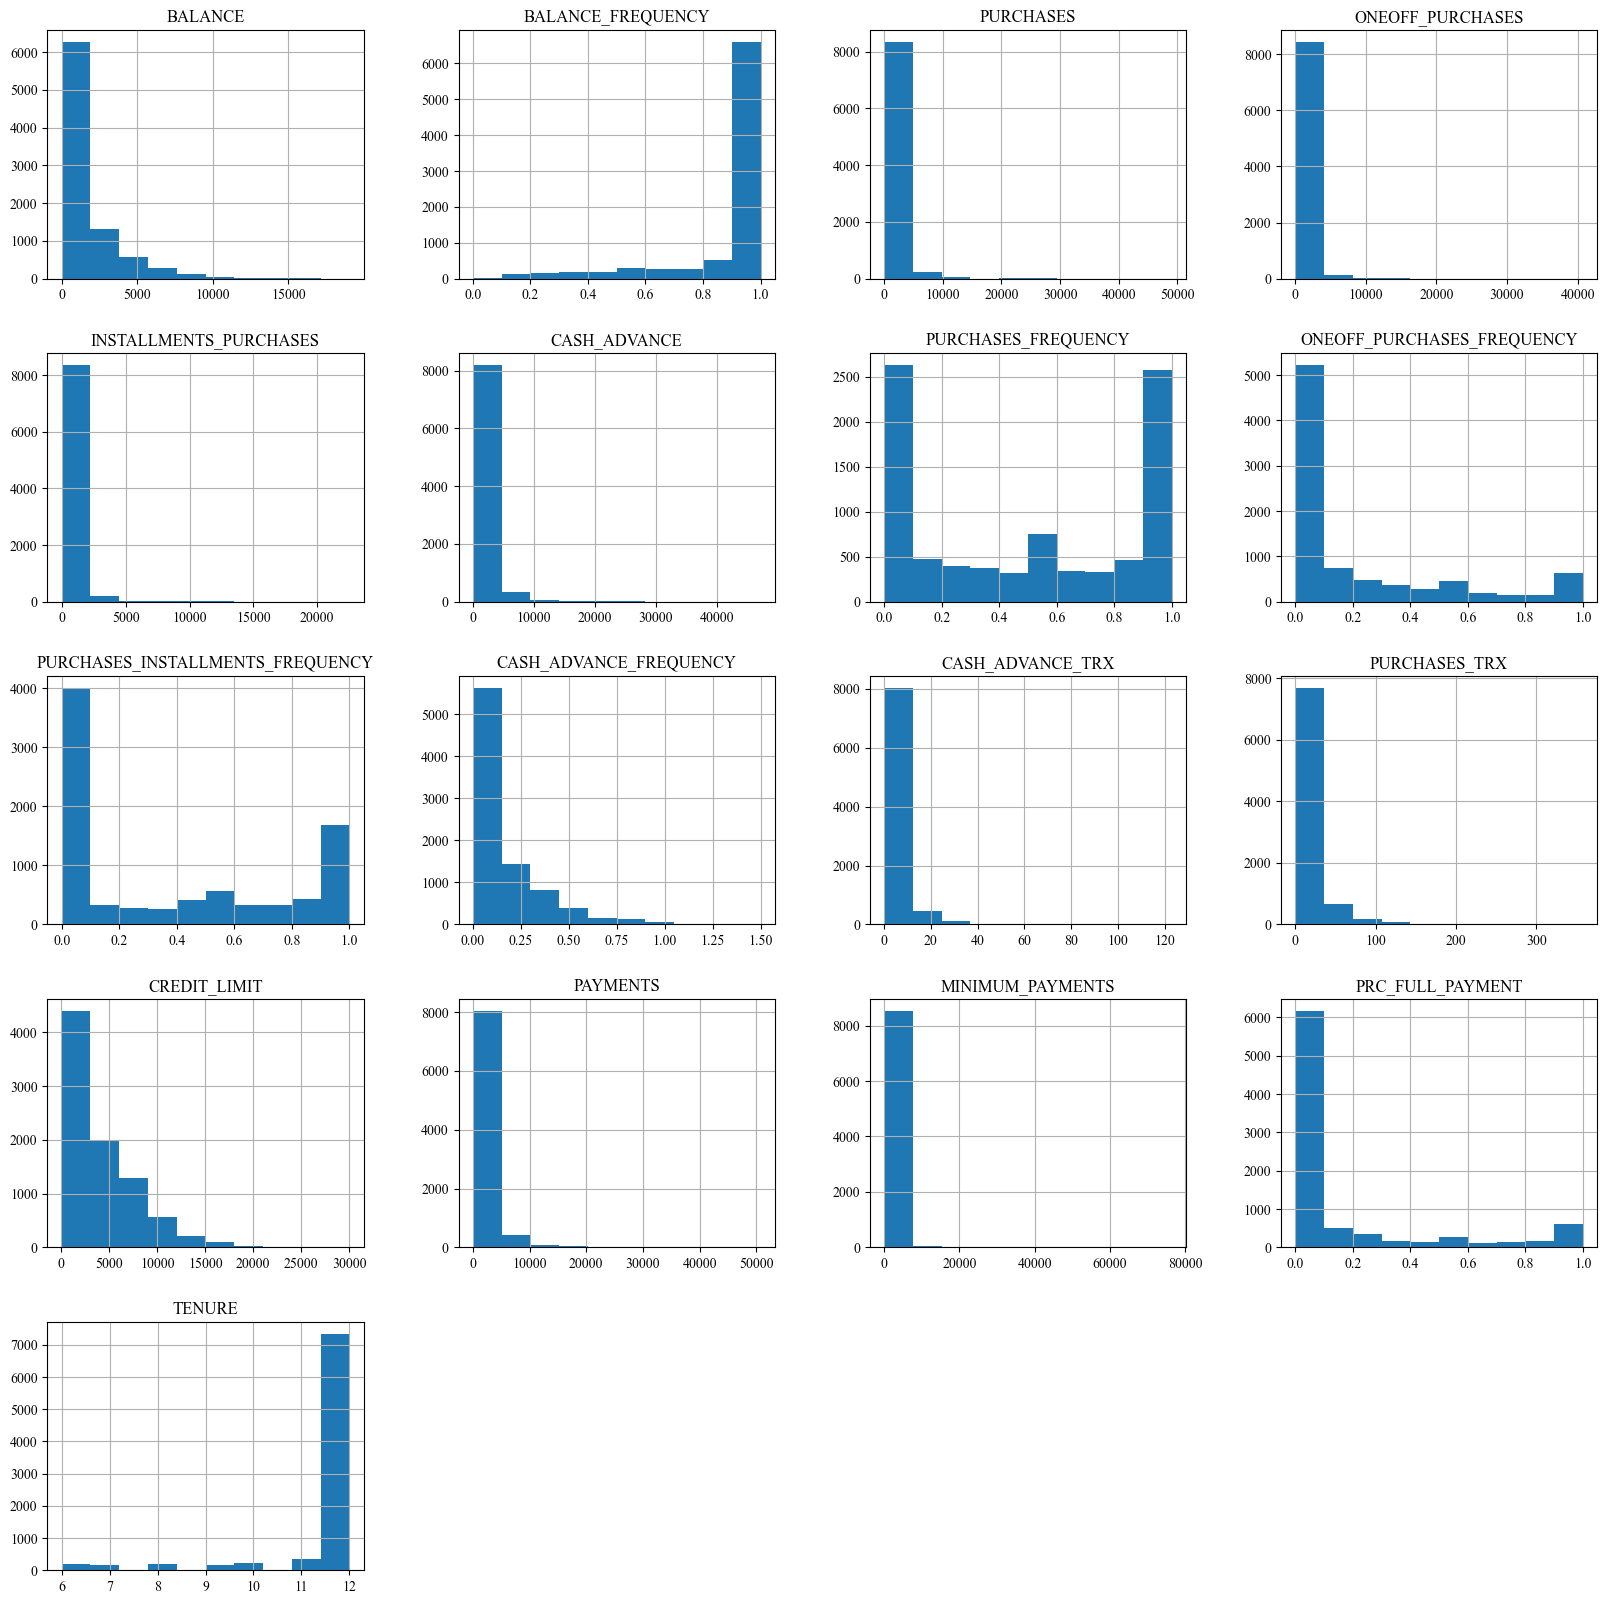

In [4]:
data.hist(figsize=(20,20))
plt.show()

### <font face="黑体">c.进行 K 均值聚类</font>

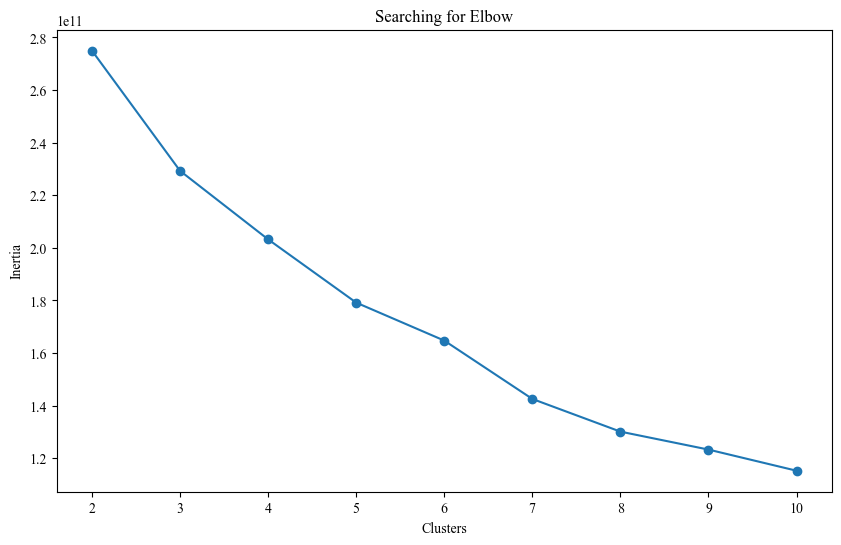

In [5]:
WSCC = []
for i in range(2, 11):
    km = KMeans(n_clusters=i, n_init='auto', random_state=0, algorithm='elkan').fit(data)
    WSCC.append(km.inertia_)
x = np.arange(2, 11)
plt.figure(figsize=(10, 6))
plt.plot(x, WSCC, 'o-')
plt.title('Searching for Elbow')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

<font face="宋体">从上图中可以看出，最优的类个数为6

### <font face="黑体">d.使用最优的K进行拟合</font>

In [6]:
model = KMeans(n_clusters=6, random_state = 0, algorithm='elkan').fit(data)
model.labels_

c:\Users\NUC\Desktop\GitsProject\MachineLearningStudy\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 0, ..., 3, 3, 3])

<font face="宋体">查看每一类的个数

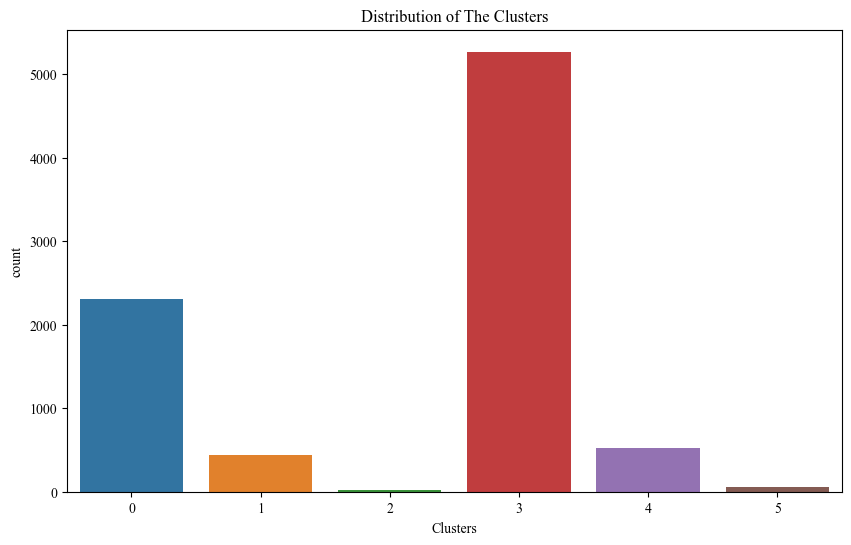

In [7]:
data["Clusters"] = model.labels_
fig, ax = plt.subplots(figsize=(10,6))
pl = sns.countplot(x = data["Clusters"])
pl.set_title("Distribution of The Clusters")
plt.show()

### <font face="黑体">e.绘制箱线图</font>

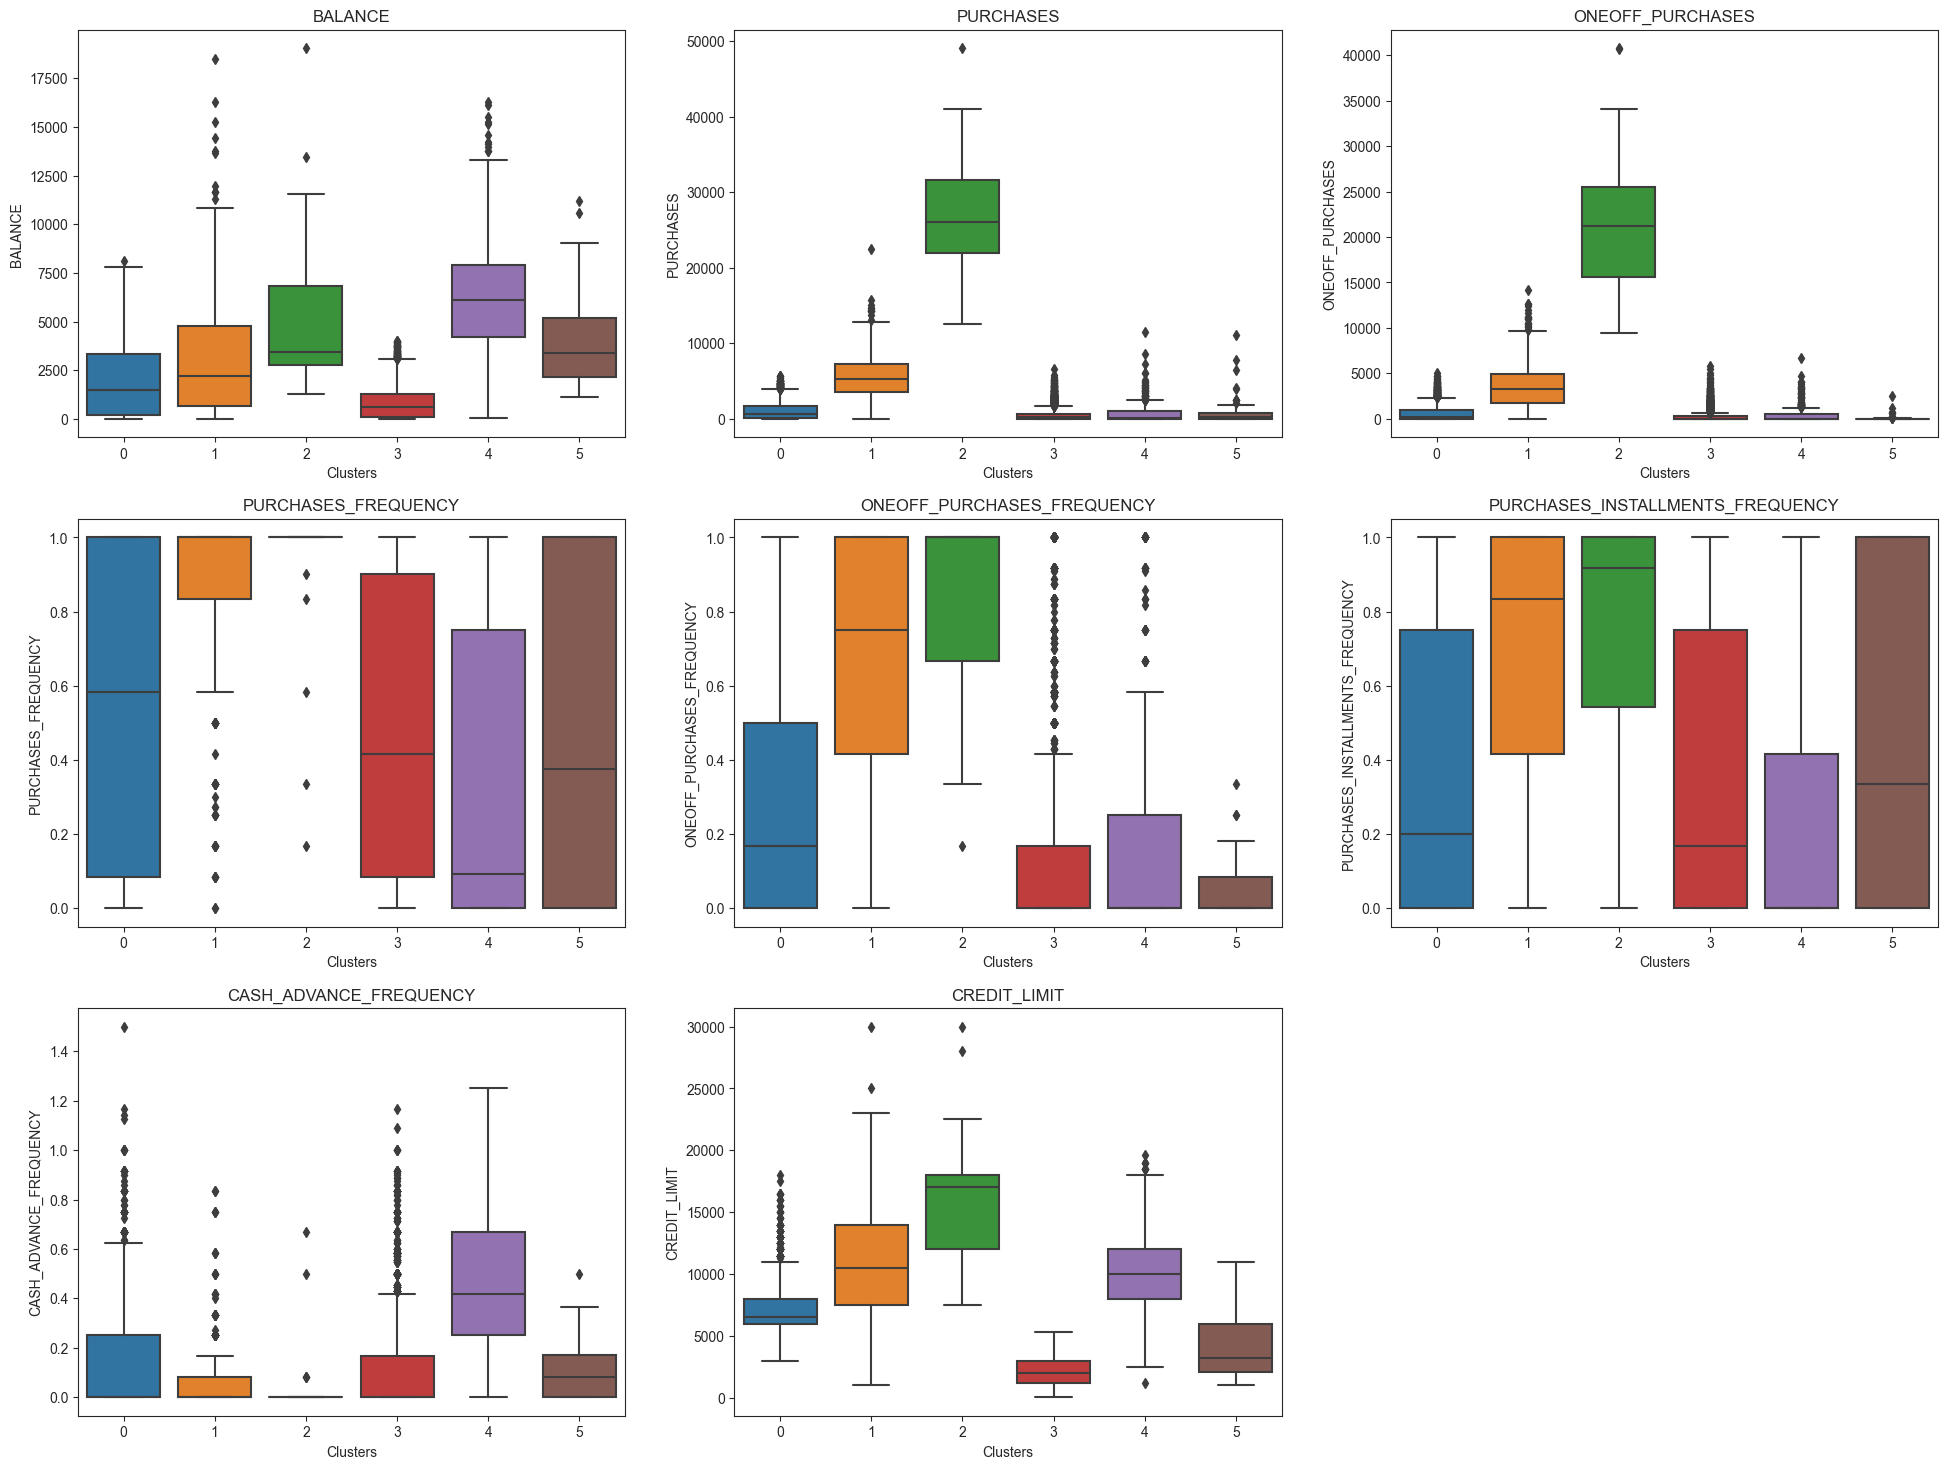

In [8]:
sns.set_style('ticks') 
col_names = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'PURCHASES_FREQUENCY',
          'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
          'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT']
plt.figure(figsize=(24,18))
for i, col in enumerate(col_names):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = "Clusters", y = col, data = data)
    plt.title(col)
plt.show()

### <font face="黑体">d.总结客户特点</font>

类0：进行的购买金额低，频率高，一次性最大金额低，余额较低，预借现金支付频率低，一次性购买频率低

类1：进行的购买金额较低，频率高，一次性最大金额低，余额较低，预借现金支付频率低，一次性购买频率高

类2：进行的购买金额高，频率高，一次性最大金额高，余额中等，预借现金支付频率低，一次性购买频率高

类3：进行购买的金额低，一次性最大金额低，余额低，预计现金支付频率低，一次性购买频率低

类4：进行购买的金额低，一次性最大金额低，余额高，预计现金支付频率低，一次性购买频率高

类5：进行购买的金额低，一次性最大金额低，余额中等，预计现金支付频率低，一次性购买频率低